In [13]:
#import necesseary libraries for svm on dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [14]:
#load the dataset parkinsons.data
data = pd.read_csv('parkinsons.data')
data.head()



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [15]:
#check for missing values in the dataset
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [16]:
#shape of the dataset
data.shape

(195, 24)

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming your dataframe is named df
selected_features = ['Shimmer:APQ3', 'spread1', 'Shimmer:APQ5', 'RPDE', 'DFA', 'spread2', 'PPE', 'D2', 'Jitter:DDP', 'MDVP:APQ', 'HNR', 'NHR', 'MDVP:Shimmer']
X = data[selected_features]
y = data['status']  # Assuming 'status' is your target variable

# Initialize the model (you can choose any model suitable for your problem)
model = LinearRegression()

# Initialize RFE
rfe = RFE(model, n_features_to_select=5)  # Selecting top 5 features

# Fit RFE
rfe.fit(X, y)

# Get selected features
selected_features_rfe = X.columns[rfe.support_]

print("Selected Features:", selected_features_rfe)


Selected Features: Index(['Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'NHR', 'MDVP:Shimmer'], dtype='object')


In [19]:
#make df of selected features
df = data[['Shimmer:APQ3', 'spread1', 'Shimmer:APQ5', 'RPDE', 'DFA', 'spread2', 'PPE', 'D2', 'Jitter:DDP', 'MDVP:APQ', 'HNR', 'NHR', 'MDVP:Shimmer', 'status']]

In [20]:
#apply the svm model
X = df.drop('status', axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy: 0.9230769230769231

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39


Confusion Matrix:
 [[ 4  3]
 [ 0 32]]


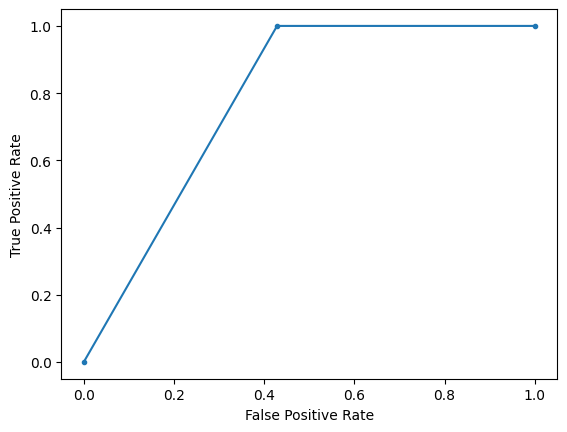

In [21]:
#provide the accuracy and classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

#plot the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


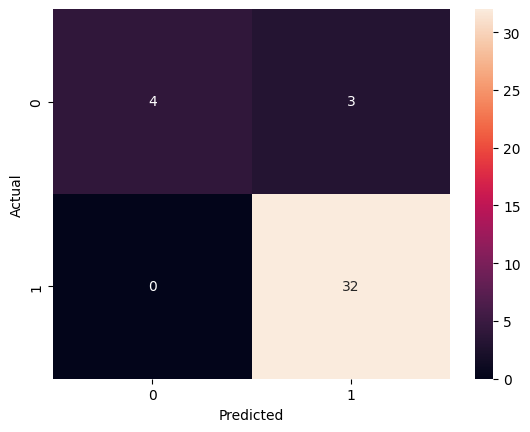

In [22]:
#heat map of confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
